### Mobile Games A/B Testing with Cookie Cats
#### (using package)

#### intro:
As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
# import os
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

##### data explanation
* userid - a unique number that identifies each player.
* version - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
* sum_gamerounds - the number of game rounds played by the player during the first week after installation
* retention_1 - did the player come back and play 1 day after installing?
* retention_7 - did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

In [2]:
df = pd.read_csv("../data/cookie_cats.csv")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# check unique user
df.userid.nunique(),df.shape[0]

(90189, 90189)

In [6]:
df.groupby("version")["sum_gamerounds"].\
        agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0,52.456264,256.716423,49854
gate_40,45489,16.0,51.298776,103.294416,2640


##### plt

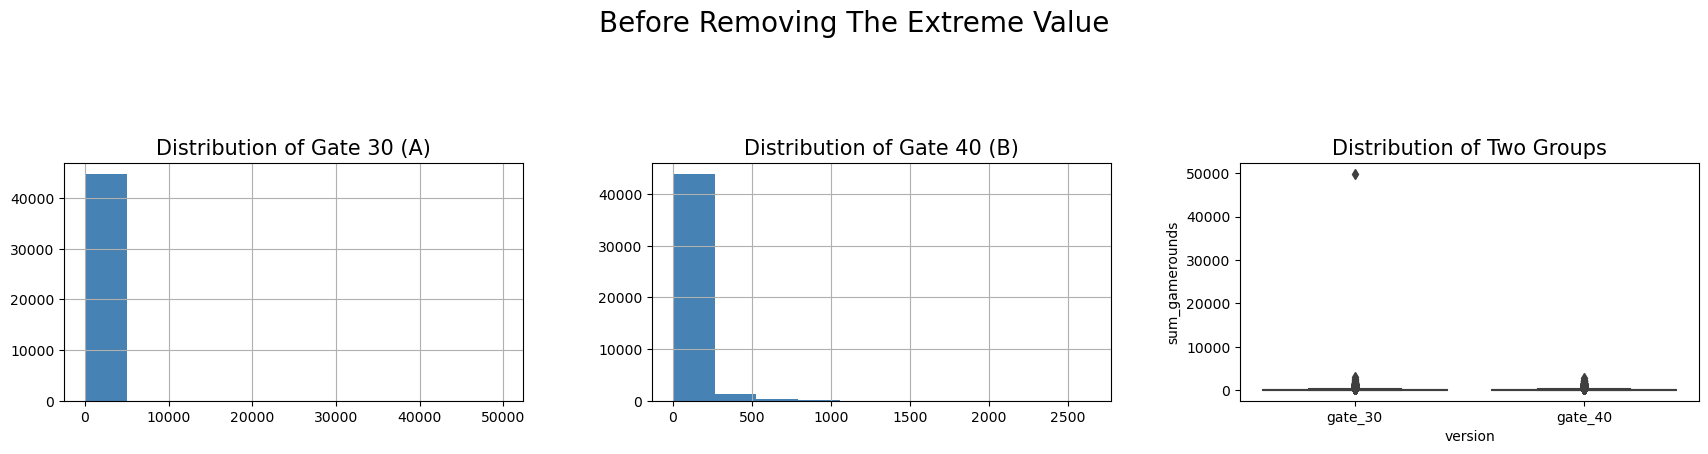

In [7]:
# plt
fig, axes = plt.subplots(1, 3, figsize = (18,5))
df[(df["version"] == "gate_30")].hist("sum_gamerounds", ax = axes[0], color = "steelblue")
df[(df["version"] == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
sns.boxplot(x = df["version"], y = df["sum_gamerounds"], ax = axes[2])

plt.suptitle("Before Removing The Extreme Value", fontsize = 20)
axes[0].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4)

Text(0.5, 0.98, 'Before Removing The Extreme Value')

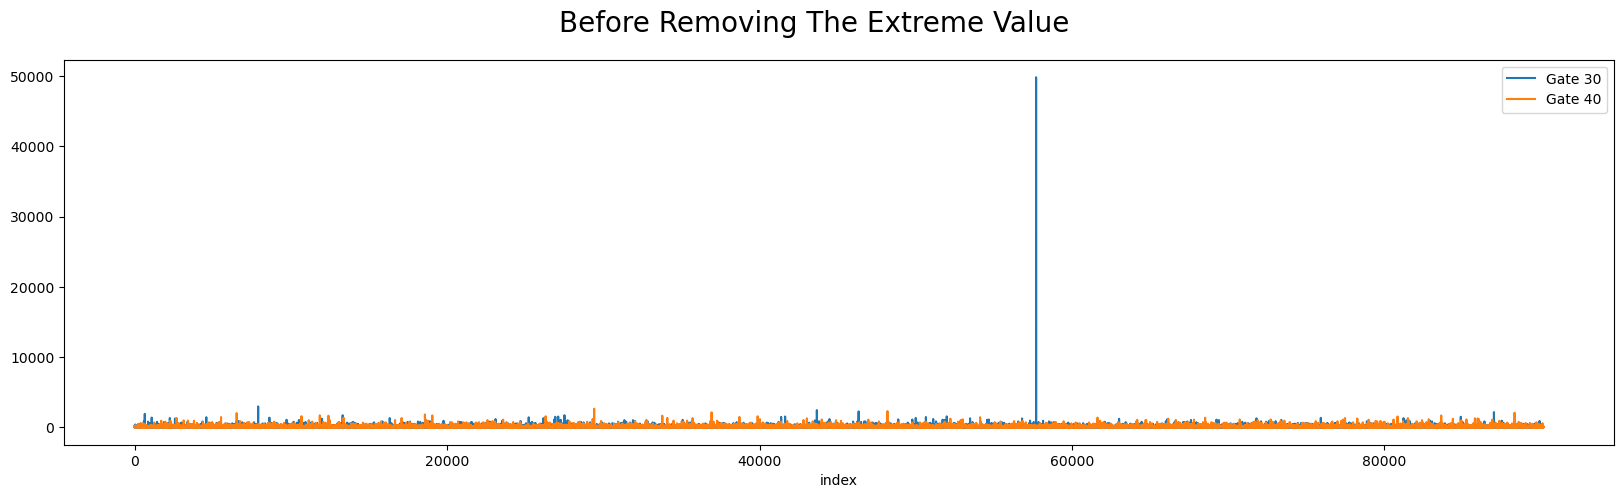

In [8]:
df[(df["version"] == "gate_30")].reset_index().set_index("index")["sum_gamerounds"].\
    plot(legend = True, label = "Gate 30", figsize = (20,5))
df[(df["version"] == "gate_40")].reset_index().set_index("index")["sum_gamerounds"].\
    plot(legend = True, label = "Gate 40")
plt.suptitle("Before Removing The Extreme Value", fontsize = 20)

##### outliers

In [ ]:
df.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]]

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
1%,0.000000
5%,1.000000
10%,1.000000
20%,3.000000
50%,16.000000
80%,67.000000


In [9]:
# from above, we can see there is outliers
# try to remove the max
df1 = df[df["sum_gamerounds"] < df["sum_gamerounds"].max()]

# Summary Stats: sum_gamerounds
df1.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99])[["sum_gamerounds"]].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,max
sum_gamerounds,90188.0,51.320253,102.682719,0.0,0.0,1.0,1.0,3.0,16.0,67.0,134.0,221.0,493.0,2961.0


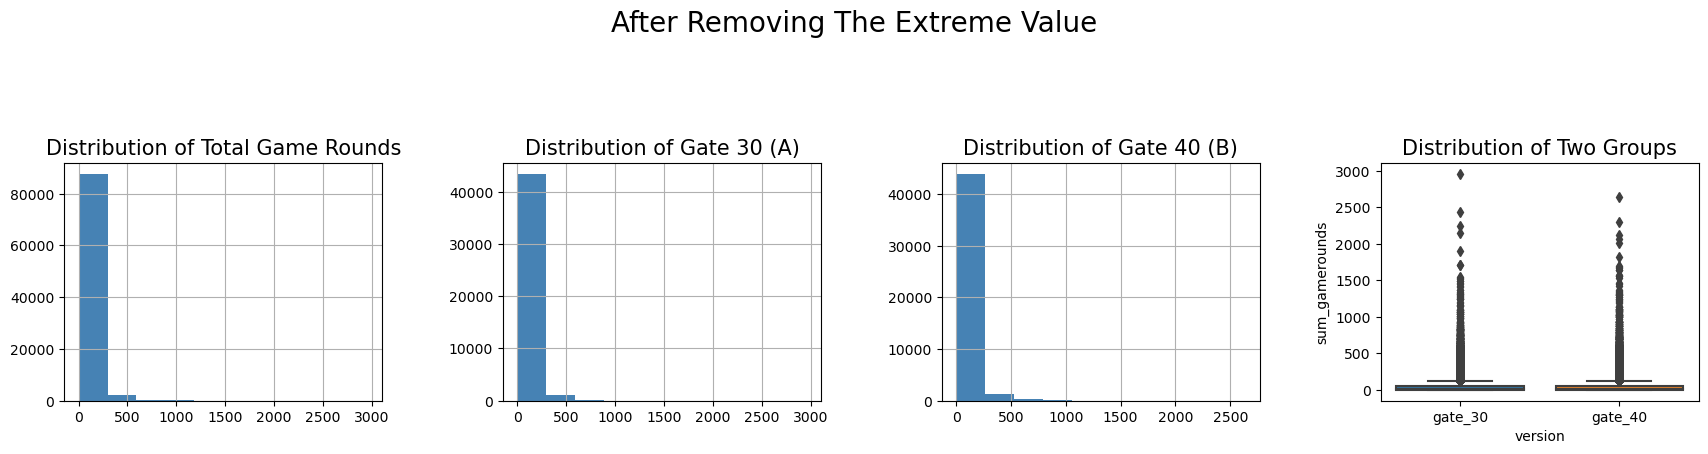

In [10]:
# plt
fig, axes = plt.subplots(1,4, figsize = (18,5))
df1["sum_gamerounds"].hist(ax = axes[0], color = "steelblue")
df1[(df1["version"] == "gate_30")].hist("sum_gamerounds", ax = axes[1], color = "steelblue")
df1[(df1["version"] == "gate_40")].hist("sum_gamerounds", ax = axes[2], color = "steelblue")
sns.boxplot(x = df1["version"], y = df1["sum_gamerounds"], ax = axes[3])

plt.suptitle("After Removing The Extreme Value", fontsize = 20)
axes[0].set_title("Distribution of Total Game Rounds", fontsize = 15)
axes[1].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[2].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[3].set_title("Distribution of Two Groups", fontsize = 15)

plt.tight_layout(pad = 4)

Text(0.5, 0.98, 'After Removing The Extreme Value')

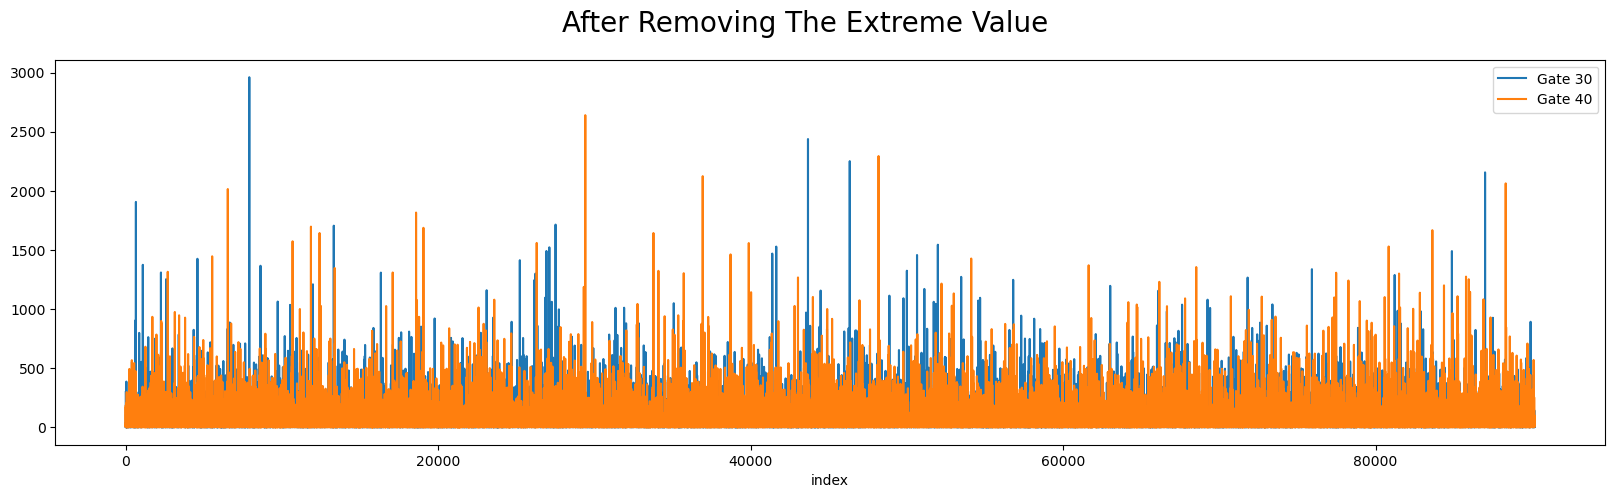

In [11]:
df1[(df1["version"] == "gate_30")].reset_index().set_index("index")["sum_gamerounds"].\
    plot(legend = True, label = "Gate 30", figsize = (20,5))
df1[(df1["version"] == "gate_40")].reset_index().set_index("index")["sum_gamerounds"].\
    plot(legend = True, label = "Gate 40")
plt.suptitle("After Removing The Extreme Value", fontsize = 20)

##### some findings
- the number of users decreases as the levels progress

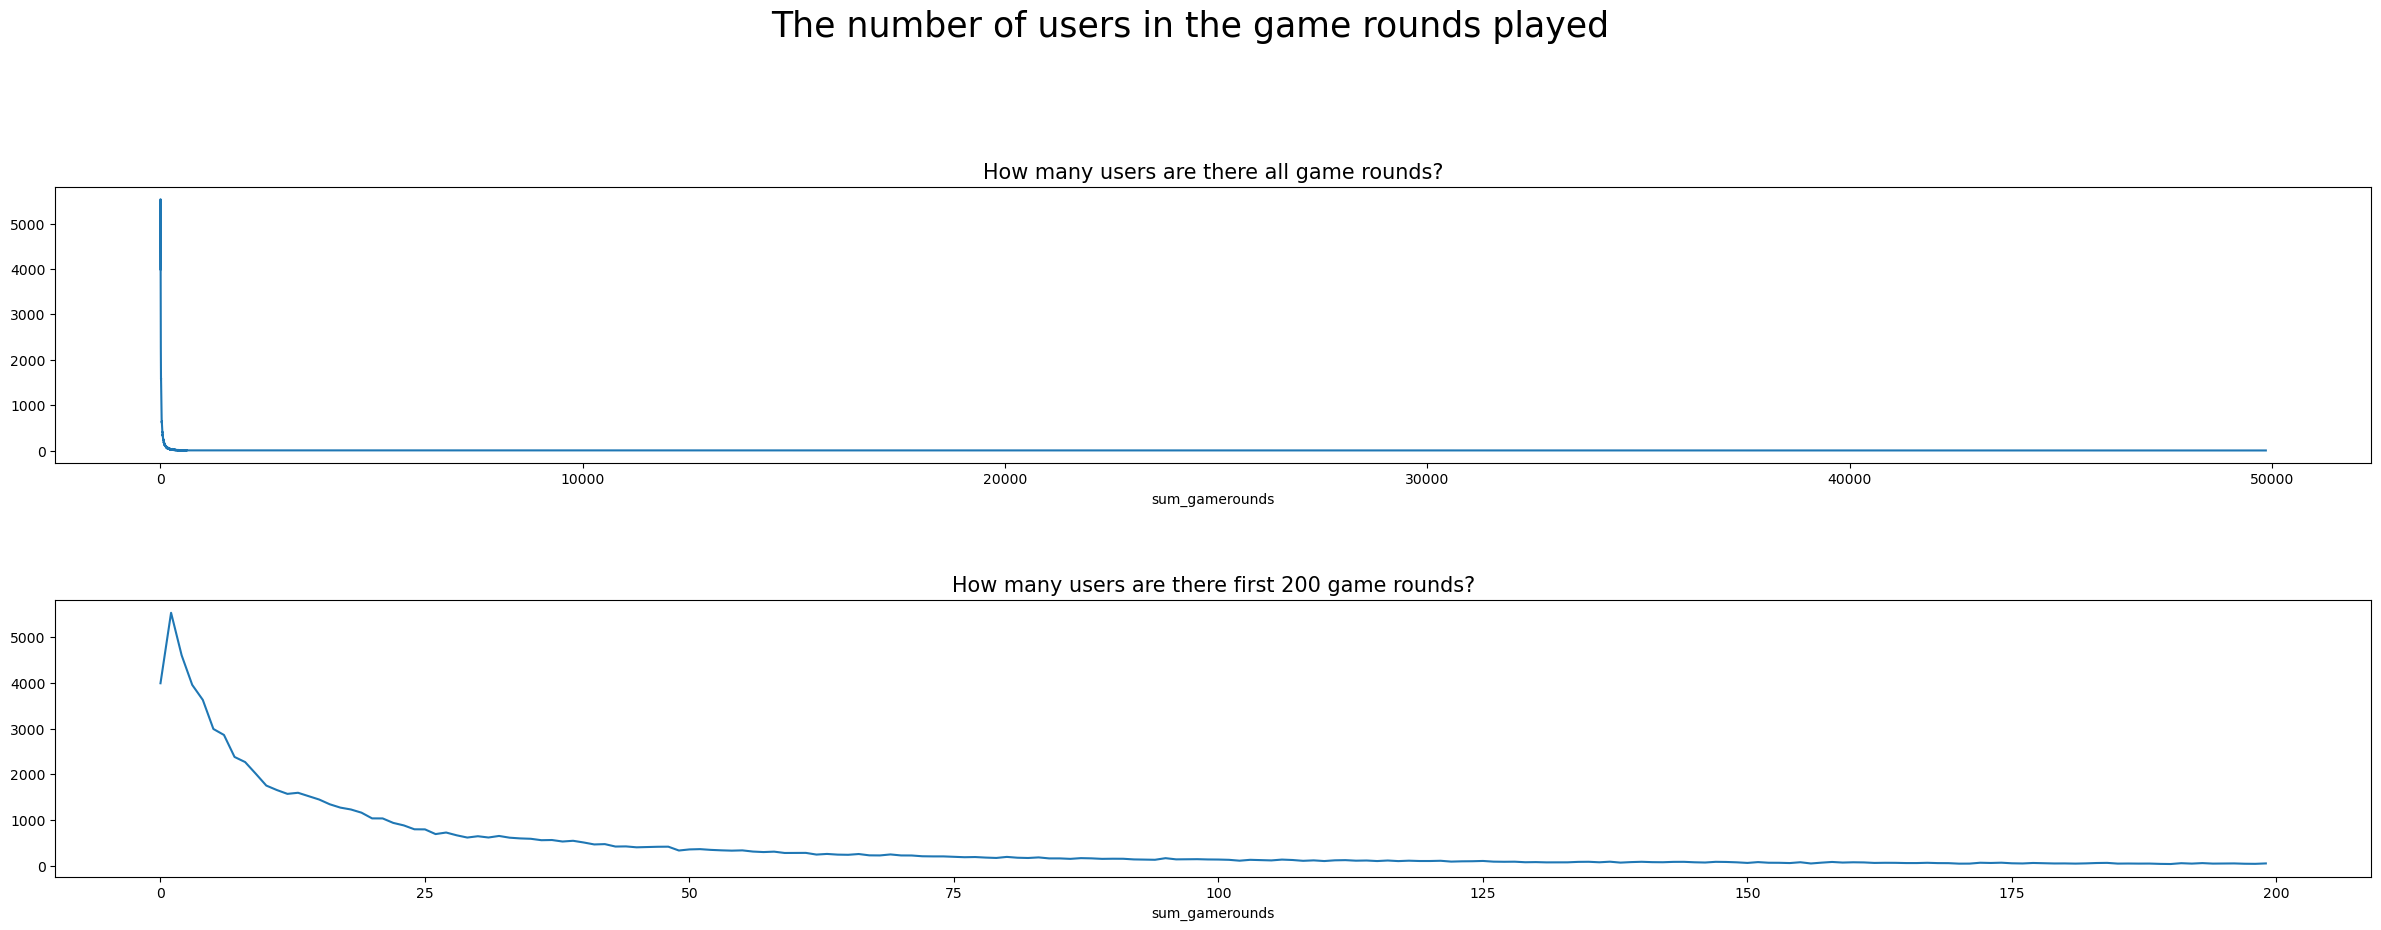

In [17]:
fig, axes = plt.subplots(2, 1, figsize = (25,10))
df.groupby("sum_gamerounds")["userid"].count().plot(ax=axes[0])
df.groupby("sum_gamerounds")["userid"].count()[:200].plot(ax=axes[1])
plt.suptitle("The number of users in the game rounds played", fontsize = 25)
axes[0].set_title("How many users are there all game rounds?", fontsize = 15)
axes[1].set_title("How many users are there first 200 game rounds?", fontsize = 15)
plt.tight_layout(pad=5)

##### A/B testing

In [19]:
# define group
df["version"] = np.where(df["version"] == "gate_30", "A", "B")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,A,3,False,False
1,337,A,38,True,False
2,377,B,165,True,False
3,483,B,1,False,False
4,488,B,179,True,True


In [20]:
# def AB tesing func
from scipy.stats import shapiro
import scipy.stats as stats
def AB_Test(dataframe, group, target):
    # Split A/B
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]
    
    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05

    # False: H0: Distribution is Normal!
    # True:  H1: Distribution is not Normal!
    if (ntA == False) & (ntB == False): #don"t reject H0, "H0: Normal Distribution"
        # Parametric Test, Assumption: Homogeneity of variances
        # False: H0: Homogeneity
        # True:  H1: Heterogeneous
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05

        if leveneTest == False: # Homogeneity
            # False: H0: M1 == M2, Homogeneity 
            # True:  H1: M1 != M2, Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
        else: # Heterogeneous
            # False: H0: M1 == M2, Homogeneity 
            # True:  H1: M1 != M2, Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
    else: # Non-Parametric Test
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
        
    temp = pd.DataFrame({"AB Hypothesis":[ttest < 0.05], "p-value":[ttest]})
    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")

    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
    
    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")

    return temp

In [21]:
AB_Test(dataframe=df, group = "version", target = "sum_gamerounds")

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Reject H0,0.025104,A/B groups are not similar!
